<span style="font-size: 40px;">Installing libraries & loading the vanilla CMU datasets</span>

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo
import seaborn as sns
from scipy import stats
import scipy.stats as st
import numpy.random as random
import ast

In [124]:
DATA_PATH = '../data/'
MOVIES_FOLDER = DATA_PATH+'MovieSummaries/'
MOVIES = MOVIES_FOLDER+"movie.metadata.tsv"
CHARACTERS = MOVIES_FOLDER+'character.metadata.tsv'

In [125]:
# Load movies and characters dataframes. Set column names.

movies_vanilla = pd.read_csv(DATA_PATH+MOVIES, sep='\t', header=None)
movies_vanilla.columns = ['wiki_ID', 'free_ID', 'movie_name', 'release_date', 'box_office_revenue', 'runtime', 'languages', 'countries', 'genres']
characters_vanilla = pd.read_csv(DATA_PATH+CHARACTERS, sep='\t', header=None)
characters_vanilla.columns = ['wiki_ID', 'free_ID', 'release_date', 'char_name', 'birth', 'gender', 'height', 'ethnicity', 'actor_name',
                      'actor_age_movie_release', 'free_char_actor_map_ID', 'free_char_ID', 'free_actor_ID']

In [126]:
display(movies_vanilla.sample(5))
display(movies_vanilla.shape)
display(movies_vanilla.info())

,wiki_ID,free_ID,movie_name,release_date,box_office_revenue,runtime,languages,countries,genres
52874,22465221,/m/05zv1vg,Belle,1973,NaN,96.0,"{""/m/064_8sq"": ""French Language""}","{""/m/0f8l9c"": ""France"", ""/m/0154j"": ""Belgium""}","{""/m/07s9rl0"": ""Drama""}"
31370,26404640,/m/07sc8r5,Kaana Kanmani,2009,NaN,132.0,"{""/m/0999q"": ""Malayalam Language""}","{""/m/03rk0"": ""India""}","{""/m/07s9rl0"": ""Drama"", ""/m/0hqxf"": ""Family Fi..."
22231,7548126,/m/0kvb69,Gorilla at Large,1954-05,NaN,67.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/028v3"": ""Detecti..."
12462,1549716,/m/059lwy,Over the Top,1987-02-12,16057580.0,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01z02hx"": ""Sports"", ""/m/03btsm8"": ""Action..."
30712,35260006,/m/0j7mgy2,Spirit,2012-06-14,NaN,145.0,"{""/m/0999q"": ""Malayalam Language""}","{""/m/03rk0"": ""India""}","{""/m/05p553"": ""Comedy film"", ""/m/07s9rl0"": ""Dr..."


(81741, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   wiki_ID             81741 non-null  int64  
 1   free_ID             81741 non-null  object 
 2   movie_name          81741 non-null  object 
 3   release_date        74839 non-null  object 
 4   box_office_revenue  8401 non-null   float64
 5   runtime             61291 non-null  float64
 6   languages           81741 non-null  object 
 7   countries           81741 non-null  object 
 8   genres              81741 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ MB


None

In [127]:
display(characters_vanilla.sample(5))
display(characters_vanilla.shape)
display(characters_vanilla.info())

,wiki_ID,free_ID,release_date,char_name,birth,gender,height,ethnicity,actor_name,actor_age_movie_release,free_char_actor_map_ID,free_char_ID,free_actor_ID
44597,24770245,/m/080lkt7,2010-01-21,Professor David Kirk,1955-02-19,M,1.91,/m/07hwkr,Jeff Daniels,54.0,/m/08d053v,/m/09sfb6k,/m/0372kf
280629,15280636,/m/03hnyw3,1982-05-28,Dolly,1962-04-18,F,1.68,NaN,Poonam Dhillon,20.0,/m/040ng0g,/m/0h5h1jl,/m/08t776
40149,21704088,/m/05mwwfc,1962-05,The Duena,1931,F,NaN,NaN,Nelly Prono,NaN,/m/0n20ksj,/m/0n20ksm,/m/0n20ksv
296923,11699620,/m/05jlby,1950,NaN,1885-09-17,M,NaN,NaN,George Cleveland,NaN,/m/0cs67fk,NaN,/m/02x4218
144952,3748405,/m/09yx4l,1964,Miss Marple,1892-05-11,F,NaN,NaN,Margaret Rutherford,NaN,/m/02tbctl,/m/0h5lznc,/m/0g70_


(450669, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450669 entries, 0 to 450668
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   wiki_ID                  450669 non-null  int64  
 1   free_ID                  450669 non-null  object 
 2   release_date             440674 non-null  object 
 3   char_name                192794 non-null  object 
 4   birth                    344524 non-null  object 
 5   gender                   405060 non-null  object 
 6   height                   154824 non-null  float64
 7   ethnicity                106058 non-null  object 
 8   actor_name               449441 non-null  object 
 9   actor_age_movie_release  292556 non-null  float64
 10  free_char_actor_map_ID   450669 non-null  object 
 11  free_char_ID             192804 non-null  object 
 12  free_actor_ID            449854 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 44.7+ MB


None

<span style="font-size: 40px;">Movie Dataframe Cleaning</span>

In [128]:
# Deep copy of original movie df. Cleaning countries, languages and genres format 

movies = movies_vanilla.copy(deep=True)

movies['countries'] = movies['countries'].apply(ast.literal_eval)
movies['countries'] = movies['countries'].apply(lambda x: ', '.join(x.values()))

movies['languages'] = movies['languages'].apply(ast.literal_eval)
movies['languages'] = movies['languages'].apply(lambda x: ', '.join(x.values()))

movies['genres'] = movies['genres'].apply(ast.literal_eval)
movies['genres'] = movies['genres'].apply(lambda x: ', '.join(x.values()))

display(movies.sample(5))
display(movies.shape)
display(movies.info())
display(len(movies) == len(movies_vanilla)) # Should not lose any row

,wiki_ID,free_ID,movie_name,release_date,box_office_revenue,runtime,languages,countries,genres
73729,14440206,/m/03d3lw8,Tiësto in Concert 2,NaN,NaN,NaN,,,"Music, Concert film"
40638,12380315,/m/02w200g,That's My Boy,1932-10-06,NaN,71.0,English Language,United States of America,"Drama, Black-and-white"
46543,7491218,/m/0kv92x,She Walketh Alone,1915-04-21,NaN,NaN,"Silent film, English Language",United States of America,"Short Film, Silent film, Indie, Black-and-white"
23144,18334152,/m/04jpgnp,Fastest with the Mostest,1960-01-09,NaN,NaN,,,"Short Film, Family Film, Comedy, Animation"
42773,28149527,/m/0cmcgfh,"Jáchyme, hoď ho do stroje!",1974-08-01,NaN,95.0,Czech Language,Czechoslovakia,Comedy


(81741, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   wiki_ID             81741 non-null  int64  
 1   free_ID             81741 non-null  object 
 2   movie_name          81741 non-null  object 
 3   release_date        74839 non-null  object 
 4   box_office_revenue  8401 non-null   float64
 5   runtime             61291 non-null  float64
 6   languages           81741 non-null  object 
 7   countries           81741 non-null  object 
 8   genres              81741 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ MB


None

True

In [129]:
# Handling release dates

def extract_month(date):
    if '-' in str(date):
        return str(date)[5:7]  # Extract characters at positions 5 and 6 (0-based index)
    else:
        return None

if 'release_date' in movies.columns:
    movies = movies.rename(columns={'release_date': 'release_year'})
    
if 'release_month' not in movies.columns:
    movies.insert(movies.columns.get_loc('release_year') + 1, 'release_month', movies['release_year'].apply(extract_month))
    movies['release_year'] = movies['release_year'].str.replace(r'-\d{2}-\d{2}$', '', regex=True)
    movies['release_year'] = movies['release_year'].str.replace(r'-\d{2}$', '', regex=True)
    movies['release_year'] = pd.to_numeric(movies['release_year'], errors='coerce').astype('Int64')
    movies['release_month'] = pd.to_numeric(movies['release_month'], errors='coerce').astype('Int64')

display(movies.sample(5))
display(len(movies) == len(movies_vanilla)) # Should not lose any rows/columns

,wiki_ID,free_ID,movie_name,release_year,release_month,box_office_revenue,runtime,languages,countries,genres
49398,32461301,/m/0dj9z93,22nd of May,2010,<NA>,NaN,88.0,"French Language, Dutch Language, Flemish language","Belgium, Germany, Netherlands","Thriller, Drama, Fantasy, World cinema"
80082,623666,/m/02xt17,Spalding Gray: Terrors of Pleasure,1988,<NA>,NaN,NaN,,United States of America,"Concert film, Comedy, Stand-up comedy"
69087,9732060,/m/02pqhyc,The Illusionist,2010,2,5602431.0,80.0,"French Language, Gaelic, English Language","France, United Kingdom","Fantasy, Drama, Comedy, Animation"
56446,1067680,/m/0433j3,Ivans XTC,2000,<NA>,NaN,92.0,English Language,"United States of America, United Kingdom",Drama
20426,5943254,/m/0ffscm,Burglar,1987,3,16357355.0,91.0,English Language,"United States of America, Canada","Action/Adventure, Mystery, Action, Comedy"


True

In [130]:
# Check for obvious release date outliers and get rid of NaN values

display(movies.release_year.sort_values(ascending=True).head(5))
display(movies.release_year.sort_values(ascending=False).head(5))

# Get rid of the movie released in 1010 and of the NaN values 

movies2 = movies.copy(deep=True)
movies2 = movies[(movies['release_year'] > 1800) & (movies['release_year'].notna())].reset_index(drop=True)
display(movies2.sample(5))
display(movies2.shape)
display(movies2.info())
print(movies2['release_year'].isna().any()) # movies2 has no NaN release years nor outliers

62836    1010
57963    1888
38764    1889
53907    1890
60249    1890
Name: release_year, dtype: Int64

30275    2016
64862    2016
34022    2016
8307     2015
51429    2015
Name: release_year, dtype: Int64

,wiki_ID,free_ID,movie_name,release_year,release_month,box_office_revenue,runtime,languages,countries,genres
48372,29148743,/m/0dlm4ct,African Hunting Holiday,2008,4,NaN,60.0,English Language,United Kingdom,Documentary
37563,28966103,/m/0dgr1sv,Checkmate,1935,9,NaN,67.0,English Language,United Kingdom,Crime Fiction
23201,30698629,/m/04j0nb_,A Trick of Light,1995,<NA>,NaN,79.0,German Language,Germany,"Drama, World cinema"
69287,20385855,/m/04_0h8y,After Dark,1998,<NA>,NaN,60.0,,United States of America,Music
10649,34405656,/m/0h_bnhx,Padikkadha Medhai,1960,6,NaN,NaN,Tamil Language,India,


(74838, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74838 entries, 0 to 74837
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   wiki_ID             74838 non-null  int64  
 1   free_ID             74838 non-null  object 
 2   movie_name          74838 non-null  object 
 3   release_year        74838 non-null  Int64  
 4   release_month       42666 non-null  Int64  
 5   box_office_revenue  8327 non-null   float64
 6   runtime             58630 non-null  float64
 7   languages           74838 non-null  object 
 8   countries           74838 non-null  object 
 9   genres              74838 non-null  object 
dtypes: Int64(2), float64(2), int64(1), object(5)
memory usage: 5.9+ MB


None

False


In [131]:
# Check runtime

display(movies2[movies2['runtime'] <= 0])
movies2['runtime'] = movies2['runtime'].replace(0, pd.NA)
display(movies2[movies2['runtime'] <= 0])

,wiki_ID,free_ID,movie_name,release_year,release_month,box_office_revenue,runtime,languages,countries,genres
38870,786716,/m/03c6bq,Dickson Experimental Sound Film,1894,<NA>,NaN,0.0,English Language,United States of America,Short Film


,wiki_ID,free_ID,movie_name,release_year,release_month,box_office_revenue,runtime,languages,countries,genres


In [132]:
# Function to check if there are any doublons in some columns of a dataframe

# def check_doublons(df, col):
#     for c in col:
#         duplicates = df[c].duplicated()
#         print(f'Rows with duplicates in column {c}: ')
#         print(df[duplicates])
#         print('-'*80)
#     return None

# def check_doublons(df, col):
#     for c in col:
#         duplicates = df[df.duplicated(c, keep=False)]  # Keep=False to mark all duplicates as True
#         if not duplicates.empty:
#             print(f'Rows with duplicates in column {c}: ')
#             print(duplicates[[c]])
#             print('-' * 80)
#         else:
#             print(f'No duplicates in column {c}')
#             print('-' * 80)
#     return None

def check_doublons(df, col_check, year, runtime):
    for c in col_check:
        duplicates = df[df.duplicated([c, year, runtime], keep=False)]  
        if not duplicates.empty:
            print(f'Rows with real duplicates in column {c}: ')
            print(duplicates[[c, year, runtime]])
            print('-' * 80)
        else:
            print(f'No duplicates in column {c}')
            print('-' * 80)
    return None


In [133]:
check_doublons(movies2, ['wiki_ID', 'free_ID', 'movie_name'], 'release_year', 'runtime')
# will deal with it later

No duplicates in column wiki_ID
--------------------------------------------------------------------------------
No duplicates in column free_ID
--------------------------------------------------------------------------------


Rows with real duplicates in column movie_name: 
                               movie_name  release_year runtime
577                                Harlow          1965   109.0
1121                               Harlow          1965   109.0
1292                       Landspeed: CKY          1999     NaN
1983                             Stranded          1916     NaN
2311                       My Blue Heaven          1990    95.0
3924                         Lolita Anime          1984     NaN
4452   Indiana Jones and the Last Crusade          1989   127.0
4911                       Landspeed: CKY          1999     NaN
5378                    Secrets of Nature          1950     NaN
9117                      Little Big Horn          1951    86.0
11591                         The Reunion          2011    90.0
12316                    Jeepers Creepers          1939     NaN
13732                             Ivanhoe          1913     NaN
15053                 Moscow Strikes Back          1942

In [134]:
display(movies2[movies2['movie_name']=='Indiana Jones and the Last Crusade'])
display(movies2[movies2['movie_name']=='Yours, Mine and Ours'])

,wiki_ID,free_ID,movie_name,release_year,release_month,box_office_revenue,runtime,languages,countries,genres
4452,3184269,/m/0dnqr,Indiana Jones and the Last Crusade,1989,5,NaN,127.0,"Greek Language, German Language, English Language",United States of America,"Costume Adventure, Action, Adventure Comedy, A..."
45070,51888,/m/0h_b6x1,Indiana Jones and the Last Crusade,1989,5,474171806.0,127.0,,,Adventure


,wiki_ID,free_ID,movie_name,release_year,release_month,box_office_revenue,runtime,languages,countries,genres
33481,1543888,/m/0592_v,"Yours, Mine and Ours",1968,4,25912624.0,111.0,English Language,United States of America,"Family Film, Drama, Comedy"
47183,20306762,/m/04_0zf4,"Yours, Mine and Ours",2005,11,NaN,88.0,English Language,United States of America,"Romance Film, Family Film, Comedy"
73311,3145964,/m/08vczx,"Yours, Mine and Ours",2005,11,72028752.0,88.0,English Language,United States of America,"Romance Film, Family Film, Comedy"


In [135]:
def fuse_duplicates(df, col_check, col1, col2):
    df_clean = df.copy(deep=True)
    df_clean[col2] = df_clean[col2].fillna(-1)
    for c in col_check:
        duplicates = df_clean[df_clean.duplicated([c, col1, col2], keep=False)]  
        
        if not duplicates.empty:
            print(f'Fusing duplicates in column {c}: ')
            
            for index, group in duplicates.groupby([c, col1, col2]):
                if len(group) > 1:
                    higher_index = group.index.max()
                    lower_index = group.index.min()

                    # Fuse 'languages', 'countries', 'genres'
                    for col in ['languages', 'countries', 'genres']:
                        if len(group.loc[higher_index, col]) > len(group.loc[lower_index, col]):
                            df_clean.at[lower_index, col] = group.loc[higher_index, col]

                    # Fuse 'release_month', 'box_office_revenue', 'runtime'
                    for col in ['release_month', 'box_office_revenue', 'runtime']:
                        if pd.isnull(group.loc[lower_index, col]) and not pd.isnull(group.loc[higher_index, col]):
                            df_clean.at[lower_index, col] = group.loc[higher_index, col]
                    
                    df_clean = df_clean.drop(higher_index)
                    
            print('Duplicates fused successfully.')
            print('-' * 80)
        else:
            print(f'No duplicates in column {c}')
            print('-' * 80)
    df_clean[col2] = df_clean[col2].replace(-1, pd.NA)
    return df_clean.reset_index(drop=True)

In [136]:
movies3 = fuse_duplicates(movies2, ['wiki_ID', 'free_ID', 'movie_name'], 'release_year', 'runtime')

No duplicates in column wiki_ID


--------------------------------------------------------------------------------
No duplicates in column free_ID
--------------------------------------------------------------------------------
Fusing duplicates in column movie_name: 
Duplicates fused successfully.
--------------------------------------------------------------------------------


In [137]:
display(movies3.sample(5))
display(movies3.shape)
display(movies3.info())

,wiki_ID,free_ID,movie_name,release_year,release_month,box_office_revenue,runtime,languages,countries,genres
47547,16285823,/m/03wg0sh,Kailashey Kelenkari,2007,<NA>,NaN,121.0,Bengali Language,India,"Thriller, Musical, Bollywood, World cinema"
59042,26806844,/m/0bmcs3d,Gasland,2010,<NA>,49428.0,104.0,English Language,United States of America,"Nature, Culture & Society, Political cinema, I..."
38845,14879288,/m/03h02gf,Karunamayudu,1978,12,NaN,160.0,Telugu language,India,"Biographical film, Drama, Family Film"
7573,12437599,/m/02w5tb9,20 Years of Dysfunction,2005,7,NaN,45.0,English Language,,Documentary
54865,2502393,/m/07jc0j,Christmas Carol: The Movie,2001,12,NaN,73.0,English Language,"United States of America, United Kingdom","Children's/Family, Children's Fantasy, Holiday..."


(74821, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74821 entries, 0 to 74820
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   wiki_ID             74821 non-null  int64  
 1   free_ID             74821 non-null  object 
 2   movie_name          74821 non-null  object 
 3   release_year        74821 non-null  Int64  
 4   release_month       42656 non-null  Int64  
 5   box_office_revenue  8327 non-null   float64
 6   runtime             58620 non-null  object 
 7   languages           74821 non-null  object 
 8   countries           74821 non-null  object 
 9   genres              74821 non-null  object 
dtypes: Int64(2), float64(1), int64(1), object(6)
memory usage: 5.9+ MB


None

In [138]:
display(movies3[movies3['movie_name']=='Indiana Jones and the Last Crusade'])
display(movies3[movies3['movie_name']=='Yours, Mine and Ours'])
display(check_doublons(movies3, ['wiki_ID', 'free_ID', 'movie_name'], 'release_year', 'runtime'))

,wiki_ID,free_ID,movie_name,release_year,release_month,box_office_revenue,runtime,languages,countries,genres
4451,3184269,/m/0dnqr,Indiana Jones and the Last Crusade,1989,5,474171806.0,127.0,"Greek Language, German Language, English Language",United States of America,"Costume Adventure, Action, Adventure Comedy, A..."


,wiki_ID,free_ID,movie_name,release_year,release_month,box_office_revenue,runtime,languages,countries,genres
33477,1543888,/m/0592_v,"Yours, Mine and Ours",1968,4,25912624.0,111.0,English Language,United States of America,"Family Film, Drama, Comedy"
47175,20306762,/m/04_0zf4,"Yours, Mine and Ours",2005,11,72028752.0,88.0,English Language,United States of America,"Romance Film, Family Film, Comedy"


No duplicates in column wiki_ID
--------------------------------------------------------------------------------
No duplicates in column free_ID
--------------------------------------------------------------------------------
No duplicates in column movie_name
--------------------------------------------------------------------------------


None

In [139]:
# Check pourcentage of missing release dates in movies2 dataframe

missing_percentage = (movies3.isna().mean() * 100).round(2)

missing_info = pd.DataFrame({
    'Column': missing_percentage.index,
    'Missing Data (%)': missing_percentage.values
}).set_index("Column")

display(missing_info)
# box office revenue high missing data

,Missing Data (%)
Column,
wiki_ID,0.00
free_ID,0.00
movie_name,0.00
release_year,0.00
release_month,42.99
box_office_revenue,88.87
runtime,21.65
languages,0.00
countries,0.00


In [140]:
display(movies3.countries.unique())
country_count = movies3.groupby('countries').size().reset_index(name='count').sort_values(by='count', ascending=False)
display(country_count.head(10))

array(['United States of America', 'Norway', 'United Kingdom', ...,
       'France, Switzerland, Algeria, Germany',
       'Kingdom of Great Britain, Japan, England, United Kingdom, Germany',
       'Switzerland, Italy, West Germany, German Democratic Republic'],
      dtype=object)

,countries,count
1552,United States of America,29176
897,India,7598
0,,5224
1535,United Kingdom,4983
1008,Japan,2011
314,France,1724
945,Italy,1631
12,Argentina,1230
159,Canada,1216
1973,"United States of America, United Kingdom",825


In [141]:
# Columns like countries & genres contain several values contained in a single cell separated by ",",

# def separate_values(df, col):
#     new_cols=(df[col].str.split(', ', expand=True).rename(columns=lambda x: f"{col}_{x+1}"))
#     return new_cols

def separate_values_biased(df, col, target):
    new_cols = df[col].str.split(', ', expand=True).rename(columns=lambda x: f"{col}_{x+1}")
    usa_column = new_cols.apply(lambda row: target in row.values, axis=1)
    df[col] = np.where(usa_column, target, new_cols.iloc[:, 0]) 
    return df

movies3 = separate_values_biased(movies3, 'countries', 'United States of America')
# display(movies3_ctr.sample(5))
# movies3.countries = movies3_ctr.countries_1
# movies3 = movies3.drop(columns='countries_1')
display(movies3.sample(5))
display(movies3.countries.unique())
country_count = movies3.groupby('countries').size().reset_index(name='count').sort_values(by='count', ascending=False)
display(country_count.head(10))

,wiki_ID,free_ID,movie_name,release_year,release_month,box_office_revenue,runtime,languages,countries,genres
54685,6288335,/m/0f_kpd,Cannon for Cordoba,1970,10,NaN,103.0,English Language,United States of America,"Action/Adventure, Western, Action, Adventure"
61115,9179013,/m/027_bmz,Rationing,1944,<NA>,NaN,93.0,English Language,United States of America,Comedy
66216,1963987,/m/069d55,Go for Broke!,1951,<NA>,2500000.0,92.0,English Language,United States of America,"Action/Adventure, Action, Drama, Black-and-whi..."
44034,26152459,/m/0b6df62,Better Late Than Never,1983,4,24164.0,89.0,English Language,United Kingdom,Comedy film
14204,4155619,/m/0bm3nt,Something the Lord Made,2004,5,NaN,117.0,English Language,United States of America,"Biopic [feature], Drama, Medical fiction, Docu..."


array(['United States of America', 'Norway', 'United Kingdom', 'Germany',
       'South Africa', 'Argentina', 'Japan', 'Turkey', '',
       'German Democratic Republic', 'Soviet Union', 'France', 'India',
       'New Zealand', 'Mexico', 'Australia', 'Hong Kong', 'Italy',
       'Denmark', 'Canada', 'Brazil', 'Netherlands', 'Poland', 'Spain',
       'South Korea', 'Hungary', 'West Germany', 'Pakistan', 'Nepal',
       'Finland', 'Ireland', 'China', 'Austria', 'Philippines', 'Romania',
       'Slovakia', 'Sweden', 'Czechoslovakia', 'Northern Ireland',
       'Greece', 'Yugoslavia', 'Portugal', 'Egypt', 'England',
       'Bosnia and Herzegovina', 'Belgium', 'Croatia', 'Israel',
       'Czech Republic', 'Uzbekistan', 'Switzerland', 'Russia',
       'Nazi Germany', 'Weimar Republic', 'Puerto Rico', 'Indonesia',
       'Albania', 'Cambodia', 'Iran', 'Estonia', 'Thailand', 'Iceland',
       'Scotland', 'Venezuela', 'Vietnam', 'Malaysia', 'Bangladesh',
       'Colombia', 'Senegal', 'Serbia', '

,countries,count
122,United States of America,33192
51,India,7651
0,,5224
121,United Kingdom,5112
41,France,3599
60,Japan,2088
58,Italy,1811
22,Canada,1343
4,Argentina,1252
48,Hong Kong,996


In [142]:
movies_USA = movies3.copy(deep=True)
movies_USA = movies3[movies3['countries'] == 'United States of America'].reset_index(drop=True) # policy for countries: keep only USA or keep if USA part of countries?
display(movies_USA.sample(5))
display(movies_USA.shape)
display(movies_USA.info())

movies_india = movies3.copy(deep=True)
movies_india = movies3[movies3['countries'] == 'India'].reset_index(drop=True)
# display(movies_india)

movies_UK = movies3.copy(deep=True)
movies_UK = movies3[movies3['countries'] == 'United Kingdom'].reset_index(drop=True)
# display(movies_UK)

movies_jap = movies3.copy(deep=True)
movies_jap = movies3[movies3['countries'] == 'Japan'].reset_index(drop=True)
# display(movies_jap)

,wiki_ID,free_ID,movie_name,release_year,release_month,box_office_revenue,runtime,languages,countries,genres
23409,3100741,/m/08rf_y,Abraham,1994,4,NaN,175.0,English Language,United States of America,"Christian film, Biography, Drama, Epic, Televi..."
27632,5009511,/m/0cznv3,The Positively True Adventures of the Alleged ...,1993,<NA>,NaN,91.0,English Language,United States of America,"Parody, Media Satire, Melodrama, Television mo..."
24273,13024213,/m/02z3sx0,Fire Down Below,1957,5,2050000.0,115.0,English Language,United States of America,"Action/Adventure, Romance Film, Action, Drama,..."
32945,859556,/m/03h_yy,The Singing Detective,2003,1,337174.0,109.0,English Language,United States of America,"Crime Fiction, Thriller, Indie, Period piece, ..."
4908,3946045,/m/0b814h,The Big Knife,1955,11,NaN,114.0,English Language,United States of America,"Drama, Black-and-white, Film noir, Film adapta..."


(33192, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33192 entries, 0 to 33191
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   wiki_ID             33192 non-null  int64  
 1   free_ID             33192 non-null  object 
 2   movie_name          33192 non-null  object 
 3   release_year        33192 non-null  Int64  
 4   release_month       21892 non-null  Int64  
 5   box_office_revenue  6924 non-null   float64
 6   runtime             29074 non-null  object 
 7   languages           33192 non-null  object 
 8   countries           33192 non-null  object 
 9   genres              33192 non-null  object 
dtypes: Int64(2), float64(1), int64(1), object(6)
memory usage: 2.6+ MB


None

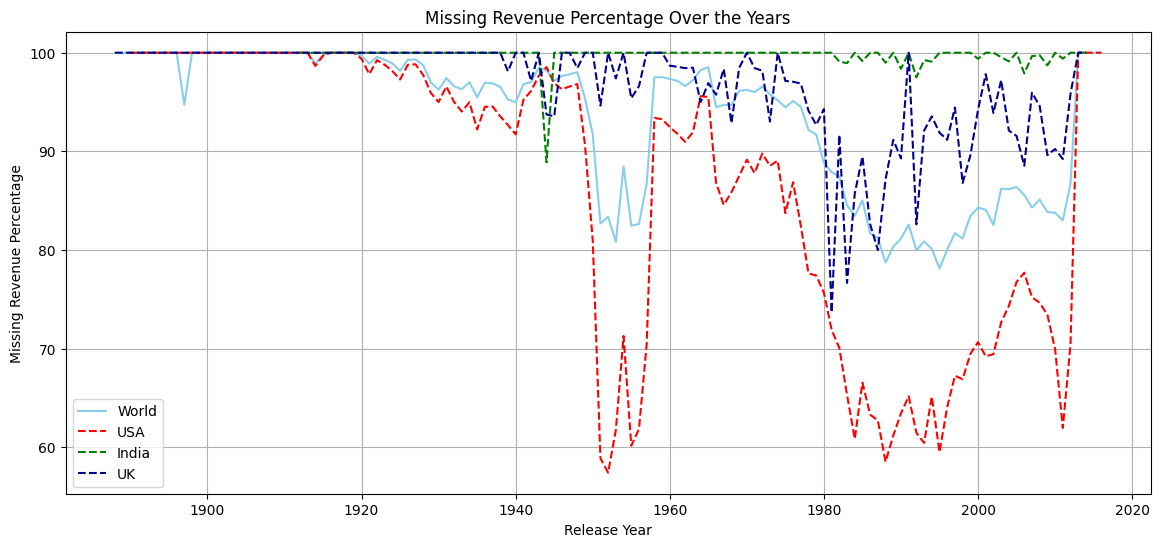

In [143]:
missing_revenue = movies3.groupby("release_year")["box_office_revenue"].apply(lambda x: 
                                                                                (x.isnull().sum() / len(x)) * 100).reset_index().set_index(
        "release_year")
missing_revenue_USA = movies_USA.groupby("release_year")["box_office_revenue"].apply(lambda x: 
                                                                                (x.isnull().sum() / len(x)) * 100).reset_index().set_index(
        "release_year")
missing_revenue_india = movies_india.groupby("release_year")["box_office_revenue"].apply(lambda x: 
                                                                                (x.isnull().sum() / len(x)) * 100).reset_index().set_index(
        "release_year")
missing_revenue_UK = movies_UK.groupby("release_year")["box_office_revenue"].apply(lambda x: 
                                                                                (x.isnull().sum() / len(x)) * 100).reset_index().set_index(
        "release_year")
# missing_revenue_jap = movies_jap.groupby("release_year")["box_office_revenue"].apply(lambda x: 
#                                                                                 (x.isnull().sum() / len(x)) * 100).reset_index().set_index(
#         "release_year")


plt.figure(figsize=(14, 6))

plt.plot(missing_revenue.index, missing_revenue["box_office_revenue"], linestyle='-', color='skyblue', label='World')

# Plot for specific countries
plt.plot(missing_revenue_USA.index, missing_revenue_USA["box_office_revenue"], linestyle='--', color='r', label='USA')
plt.plot(missing_revenue_india.index, missing_revenue_india["box_office_revenue"], linestyle='--', color='g', label='India')
plt.plot(missing_revenue_UK.index, missing_revenue_UK["box_office_revenue"], linestyle='--', color='darkblue', label='UK')
# plt.plot(missing_revenue_jap.index, missing_revenue_jap["box_office_revenue"], linestyle='--', color='orange', label='Japan')

# Adding labels and title
plt.xlabel("Release Year")
plt.ylabel("Missing Revenue Percentage")
plt.title("Missing Revenue Percentage Over the Years")
plt.grid()

# Adding legend
plt.legend()

# Show the plot
plt.show()

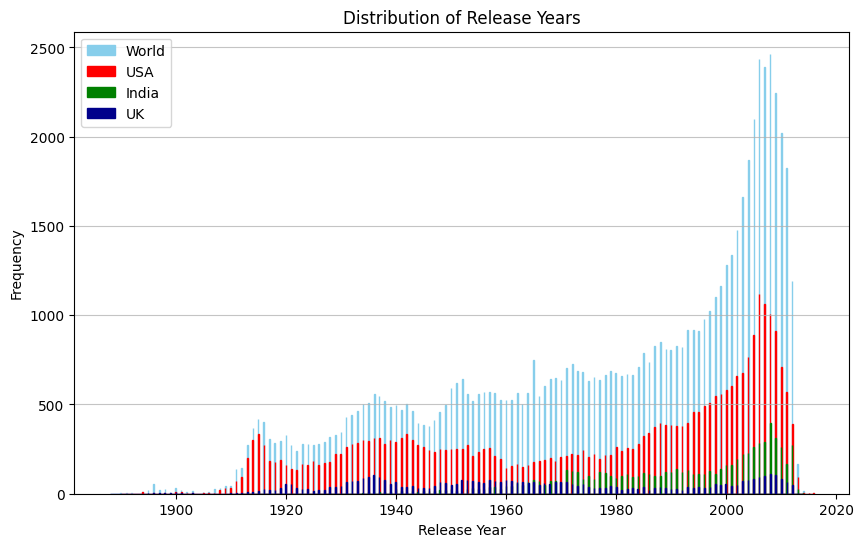

In [144]:
plt.figure(figsize=(10, 6))
plt.hist(movies3['release_year'], bins=1000, color='skyblue', edgecolor='skyblue', label='World')
plt.hist(movies_USA['release_year'], bins=1000, color='red', edgecolor='red', label='USA')
plt.hist(movies_india['release_year'], bins=1000, color='g', edgecolor='g', label='India')
plt.hist(movies_UK['release_year'], bins=1000, color='darkblue', edgecolor='darkblue', label='UK')
# plt.hist(movies_jap['release_year'], bins=1000, color='orange', edgecolor='orange', label='Japan')
plt.xlabel("Release Year")
plt.ylabel("Frequency")
plt.title("Distribution of Release Years")
plt.grid(axis='y', alpha=0.75)
plt.legend()
plt.show()

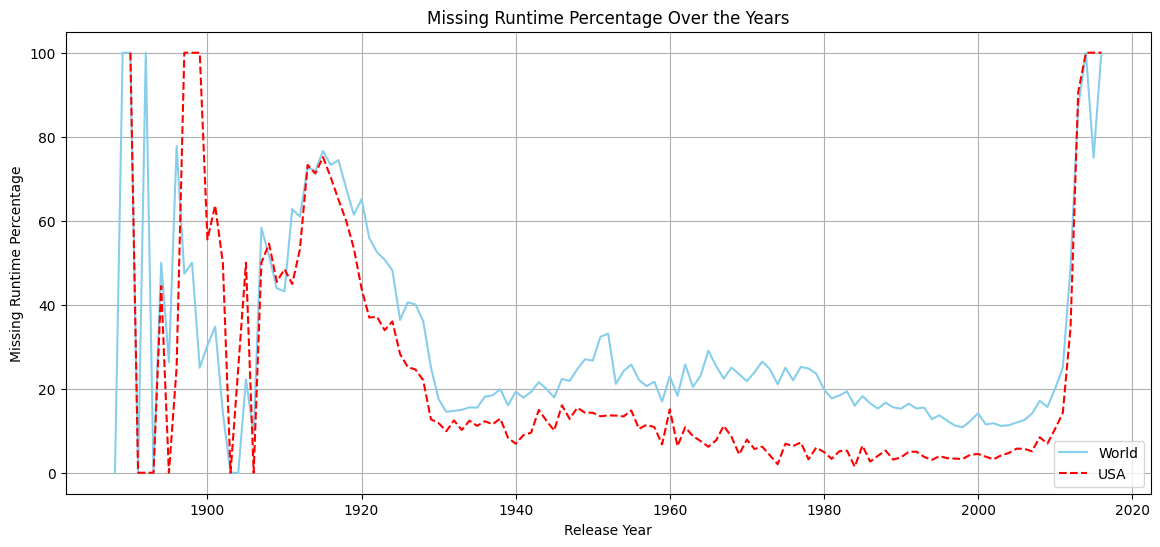

In [145]:
missing_runtime = movies3.groupby("release_year")["runtime"].apply(lambda x: 
                                                                                (x.isnull().sum() / len(x)) * 100).reset_index().set_index(
        "release_year")

missing_runtime_USA = movies_USA.groupby("release_year")["runtime"].apply(lambda x: 
                                                                                (x.isnull().sum() / len(x)) * 100).reset_index().set_index(
        "release_year")


plt.figure(figsize=(14, 6))

plt.plot(missing_runtime.index, missing_runtime["runtime"], linestyle='-', color='skyblue', label='World')
plt.plot(missing_runtime_USA.index, missing_runtime_USA["runtime"], linestyle='--', color='r', label='USA')
plt.xlabel("Release Year")
plt.ylabel("Missing Runtime Percentage")
plt.title("Missing Runtime Percentage Over the Years")
plt.grid()
plt.legend()
plt.show()

In [146]:
missing_percentage_USA = (movies_USA.isna().mean() * 100).round(2)

missing_info_USA = pd.DataFrame({
    'Column': missing_percentage_USA.index,
    'Missing Data (%)': missing_percentage_USA.values
}).set_index("Column")

display(missing_info_USA)

,Missing Data (%)
Column,
wiki_ID,0.00
free_ID,0.00
movie_name,0.00
release_year,0.00
release_month,34.04
box_office_revenue,79.14
runtime,12.41
languages,0.00
countries,0.00


In [147]:
# Addressing doublons

check_doublons(movies_USA, ['wiki_ID', 'free_ID', 'movie_name'], 'release_year', 'runtime')

No duplicates in column wiki_ID
--------------------------------------------------------------------------------
No duplicates in column free_ID
--------------------------------------------------------------------------------
No duplicates in column movie_name
--------------------------------------------------------------------------------


In [148]:
movies_USA[movies_USA['movie_name']=='Landspeed: CKY']

,wiki_ID,free_ID,movie_name,release_year,release_month,box_office_revenue,runtime,languages,countries,genres
580,8721073,/m/0gl0dhk,Landspeed: CKY,1999,<NA>,NaN,<NA>,,United States of America,"Comedy film, Documentary"


In [149]:
movies_USA = movies_USA.rename(columns={'countries': 'country'})
display(movies_USA.sample(5))
display(movies_USA.shape)
display(movies_USA.info())

,wiki_ID,free_ID,movie_name,release_year,release_month,box_office_revenue,runtime,languages,country,genres
13877,241469,/m/01k0vc,Pandemonium,1982,4,NaN,82.0,English Language,United States of America,"Mystery, Comedy film, Horror"
23635,705984,/m/034bxn,Magnum Force,1973,12,44680473.0,123.0,English Language,United States of America,"Thriller, Crime Fiction, Action Thrillers, Mys..."
30276,34164316,/m/091m723,Till We Meet Again,1936,<NA>,NaN,72.0,English Language,United States of America,"Romance Film, Drama, War film"
12426,2249633,/m/06z50f,The Flying Saucer,1950,<NA>,NaN,69.0,English Language,United States of America,"Science Fiction, Action, Adventure, Spy"
4362,51906,/m/0dnw1,Breakfast at Tiffany's,1961,10,14000000.0,114.0,"Portuguese Language, English Language",United States of America,"Romantic comedy, Comedy of manners, Comedy-dra..."


(33192, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33192 entries, 0 to 33191
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   wiki_ID             33192 non-null  int64  
 1   free_ID             33192 non-null  object 
 2   movie_name          33192 non-null  object 
 3   release_year        33192 non-null  Int64  
 4   release_month       21892 non-null  Int64  
 5   box_office_revenue  6924 non-null   float64
 6   runtime             29074 non-null  object 
 7   languages           33192 non-null  object 
 8   country             33192 non-null  object 
 9   genres              33192 non-null  object 
dtypes: Int64(2), float64(1), int64(1), object(6)
memory usage: 2.6+ MB


None

<span style="font-size: 40px;">Building the Annex Movies DataFrame</span>

In [150]:
DANIEL_CAVE = DATA_PATH+'movie-stats_danielgrijalva/movies_daniel.csv'
MOVIE_LENS = DATA_PATH+'MovieLens/movies_lens.csv'
RATING_LENS = DATA_PATH+'MovieLens/ratings.csv'

In [151]:
# Loading Daniel movies df

movies_dan_vanilla = pd.read_csv(DANIEL_CAVE)
display(movies_dan_vanilla.sample(5))
display(movies_dan_vanilla.shape)
display(movies_dan_vanilla.info())

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2821,Top Dog,PG-13,Action,1995,"April 28, 1995 (United States)",4.2,3200.0,Aaron Norris,Aaron Norris,Chuck Norris,United States,6000000.0,5093707.0,Live Entertainment,86.0
3458,Cruel Intentions,R,Drama,1999,"March 5, 1999 (United States)",6.8,183000.0,Roger Kumble,Choderlos de Laclos,Sarah Michelle Gellar,United States,10500000.0,76347426.0,Columbia Pictures,97.0
5249,Step Brothers,R,Comedy,2008,"July 25, 2008 (United States)",6.9,274000.0,Adam McKay,Will Ferrell,Will Ferrell,United States,65000000.0,128108211.0,Columbia Pictures,98.0
1844,Point Break,R,Action,1991,"July 12, 1991 (United States)",7.3,166000.0,Kathryn Bigelow,Rick King,Patrick Swayze,United States,24000000.0,83531958.0,Largo Entertainment,122.0
6985,Goat,R,Drama,2016,"September 23, 2016 (United States)",5.7,7500.0,Andrew Neel,David Gordon Green,Ben Schnetzer,United States,NaN,23020.0,Killer Films,96.0


(7668, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


None

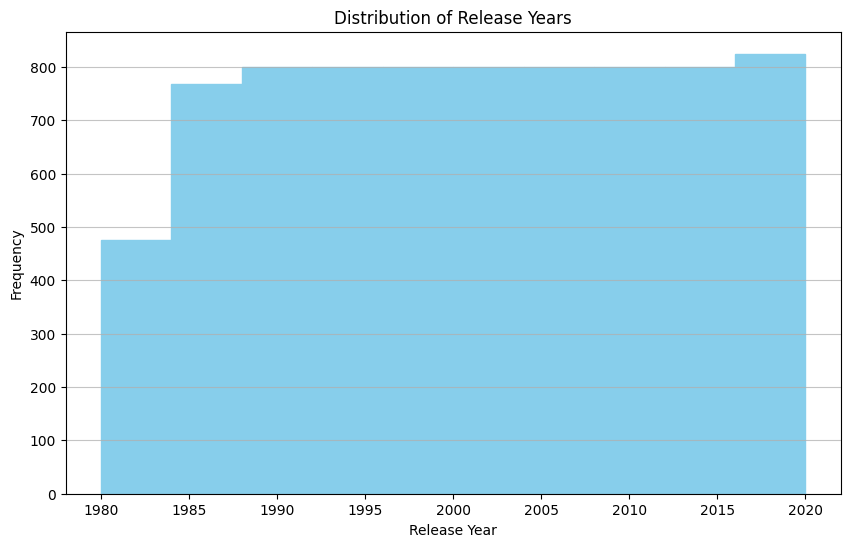

country
United States     5475
United Kingdom     816
France             279
Canada             190
Germany            117
Australia           92
Japan               81
India               62
Italy               61
Spain               47
Name: count, dtype: int64

array(['United Kingdom', 'United States', 'South Africa', 'West Germany',
       'Canada', 'Australia', 'Libya', 'Italy', 'Soviet Union', 'France',
       'Hong Kong', 'South Korea', 'Sweden', 'Spain', 'Mexico',
       'Switzerland', 'Netherlands', 'New Zealand', 'Philippines',
       'Israel', 'Japan', 'Hungary', 'Brazil', 'Yugoslavia', 'Argentina',
       'Taiwan', 'Ireland', 'Denmark', 'Germany', 'Iran', 'China',
       'Belgium', 'Austria', 'Portugal', 'Vietnam',
       'Republic of Macedonia', 'Russia',
       'Federal Republic of Yugoslavia', 'Greece', 'Czech Republic',
       'Norway', 'India', 'Jamaica', 'Aruba', 'Thailand', 'Colombia',
       'Romania', nan, 'United Arab Emirates', 'Indonesia', 'Turkey',
       'Serbia', 'Poland', 'Kenya', 'Finland', 'Iceland', 'Chile',
       'Panama', 'Malta', 'Lebanon'], dtype=object)

In [152]:
plt.figure(figsize=(10, 6))
plt.hist(movies_dan_vanilla['year'], color='skyblue', edgecolor='skyblue')
plt.xlabel("Release Year")
plt.ylabel("Frequency")
plt.title("Distribution of Release Years")
plt.grid(axis='y', alpha=0.75)
plt.show()
display(movies_dan_vanilla['country'].value_counts().head(10))
display(movies_dan_vanilla.country.unique())

In [153]:
# Keep only relevant columns

movies_dan = movies_dan_vanilla.copy(deep=True)
zero_data = movies_dan[(movies_dan.gross <= 0)|(movies_dan.gross.isna())|(movies_dan['country']!='United States')] # Grave si pas de budget ?
movies_dan.drop(zero_data.index,inplace=True)
movies_dan.drop(columns=['genre', 'released', 'score', 'votes', 'director', 'writer', 'star', 'company', 'rating'],inplace=True)

movies_dan['budget'] = movies_dan['budget'].astype(float)
print((movies_dan['budget']==0).any())
print((movies_dan['runtime']==0).any())
print((movies_dan['budget']<0).any())
print((movies_dan['runtime']<0).any())

# Don't go further than CMU dataset

movies_dan = movies_dan[movies_dan['year']<= 2016]

movies_dan = movies_dan.reset_index(drop=True)
display(movies_dan.sample(5))
display(movies_dan.shape)
display(movies_dan.info())

False
False
False
False


,name,year,country,budget,gross,runtime
3497,Snakes on a Plane,2006,United States,33000000.0,62022014.0,105.0
310,Get Crazy,1983,United States,5500000.0,1645711.0,92.0
932,Phantasm II,1988,United States,3000000.0,7282851.0,97.0
4221,Tower Heist,2011,United States,75000000.0,152930623.0,104.0
4313,Win Win,2011,United States,NaN,11789613.0,106.0


(5008, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     5008 non-null   object 
 1   year     5008 non-null   int64  
 2   country  5008 non-null   object 
 3   budget   4039 non-null   float64
 4   gross    5008 non-null   float64
 5   runtime  5007 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 234.9+ KB


None

In [154]:
movies_dan[movies_dan['name']=='Indiana Jones and the Last Crusade']

,name,year,country,budget,gross,runtime
1005,Indiana Jones and the Last Crusade,1989,United States,48000000.0,474171806.0,127.0


In [155]:
# Loading Lens movies df

movies_lens_vanilla = pd.read_csv(MOVIE_LENS, usecols=['id','title', 'release_date', 'production_countries', 'budget', 'revenue', 'runtime'])
display(movies_lens_vanilla.sample(5))
display(movies_lens_vanilla.shape)
display(movies_lens_vanilla.info())

,budget,id,production_countries,release_date,revenue,runtime,title
19053,0,109018,"[{'iso_3166_1': 'US', 'name': 'United States o...",1954-11-04,0.0,95.0,Athena
42393,0,255709,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2013-10-02,0.0,123.0,Hope
24435,0,39263,[],1971-06-16,0.0,94.0,Blood from the Mummy's Tomb
3355,0,25673,"[{'iso_3166_1': 'US', 'name': 'United States o...",1951-06-12,0.0,122.0,A Place in the Sun
18011,0,43845,"[{'iso_3166_1': 'FR', 'name': 'France'}]",1938-02-02,0.0,135.0,La Marseillaise


(45466, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                45466 non-null  object 
 1   id                    45466 non-null  object 
 2   production_countries  45463 non-null  object 
 3   release_date          45379 non-null  object 
 4   revenue               45460 non-null  float64
 5   runtime               45203 non-null  float64
 6   title                 45460 non-null  object 
dtypes: float64(2), object(5)
memory usage: 2.4+ MB


None

In [156]:
# Keep only relevant columns, check budget and runtime

movies_lens = movies_lens_vanilla.copy(deep=True)
zero_data = movies_lens[(movies_lens.revenue <= 0)|(movies_lens.revenue.isna())] # Grave si pas de budget ?
movies_lens.drop(zero_data.index,inplace=True)
movies_lens.reset_index(drop=True, inplace=True)

movies_lens['budget'] = movies_lens['budget'].astype(float)
print((movies_lens['budget']==0).any())
print((movies_lens['runtime']==0).any())
print((movies_lens['budget']<0).any())
print((movies_lens['runtime']<0).any())

movies_lens['runtime'] = movies_lens['runtime'].replace(0, pd.NA)
movies_lens['budget'] = movies_lens['budget'].replace(0, pd.NA)

display(movies_lens.head(13))
display(movies_lens.shape)
display(movies_lens.info())
print(movies_lens['production_countries'][11])
print(type(movies_lens['production_countries'][0]))

True
True
False
False


,budget,id,production_countries,release_date,revenue,runtime,title
0,30000000.0,862,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,Toy Story
1,65000000.0,8844,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,Jumanji
2,16000000.0,31357,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,Waiting to Exhale
3,<NA>,11862,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,Father of the Bride Part II
4,60000000.0,949,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,Heat
5,35000000.0,9091,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,64350171.0,106.0,Sudden Death
6,58000000.0,710,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,352194034.0,130.0,GoldenEye
7,62000000.0,9087,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-11-17,107879496.0,106.0,The American President
8,<NA>,21032,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,11348324.0,78.0,Balto
9,44000000.0,10858,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,13681765.0,192.0,Nixon


(7408, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7408 entries, 0 to 7407
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5381 non-null   object 
 1   id                    7408 non-null   object 
 2   production_countries  7408 non-null   object 
 3   release_date          7407 non-null   object 
 4   revenue               7408 non-null   float64
 5   runtime               7381 non-null   object 
 6   title                 7408 non-null   object 
dtypes: float64(1), object(6)
memory usage: 405.3+ KB


None

[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]
<class 'str'>


In [157]:
# Handling list dict structure of production_countries

if 'iso' in movies_lens['production_countries'][0].lower():
    movies_lens['production_countries'] = movies_lens['production_countries'].apply(lambda x: ', '.join([country['name'] 
                                                                                                     for country in ast.literal_eval(x)]))

display(movies_lens.sample(5))
display(movies_lens.shape)
display(movies_lens.info())

,budget,id,production_countries,release_date,revenue,runtime,title
4197,40000000.0,11483,"France, Tunisia",1986-05-08,1641825.0,124.0,Pirates
4174,15000000.0,8461,"Austria, France, Germany, Italy, United Kingdo...",2007-10-20,7938872.0,112.0,Funny Games
2831,<NA>,1277,"Germany, Hungary",1999-10-21,585604.0,112.0,Gloomy Sunday
618,7000000.0,578,United States of America,1975-06-18,470654000.0,124.0,Jaws
369,500000.0,88224,United States of America,1996-01-22,431326.0,88.0,Manny & Lo


(7408, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7408 entries, 0 to 7407
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5381 non-null   object 
 1   id                    7408 non-null   object 
 2   production_countries  7408 non-null   object 
 3   release_date          7407 non-null   object 
 4   revenue               7408 non-null   float64
 5   runtime               7381 non-null   object 
 6   title                 7408 non-null   object 
dtypes: float64(1), object(6)
memory usage: 405.3+ KB


None

In [158]:
display(movies_lens['production_countries'].value_counts().head(10))

production_countries
United States of America                    4344
United Kingdom, United States of America     268
United Kingdom                               205
India                                        183
                                             153
Germany, United States of America            120
France                                       119
Canada, United States of America             109
Russia                                       106
Japan                                         79
Name: count, dtype: int64

In [159]:

# def separate_values(df, col):
#     new_cols=(df[col].str.split(', ', expand=True).rename(columns=lambda x: f"{col}_{x+1}"))
#     return new_cols

# def separate_values_biased(df, col):
#     new_cols = df[col].str.split(', ', expand=True).rename(columns=lambda x: f"{col}_{x+1}")
#     usa_column = new_cols.apply(lambda row: "United States of America" in row.values, axis=1)
#     df['countries_1'] = np.where(usa_column, "United States of America", new_cols.iloc[:, 0]) 
#     return df

movies_lens = separate_values_biased(movies_lens, 'production_countries', 'United States of America')
# display(movies_lens_ctr.sample(5))
# movies_lens.production_countries = movies_lens_ctr.countries_1
# movies_lens = movies_lens.drop(columns='countries_1')
display(movies_lens.sample(5))
display(movies_lens.shape)
display(movies_lens.info())

display(movies_lens['production_countries'].value_counts().head(10))

,budget,id,production_countries,release_date,revenue,runtime,title
507,16000000.0,2493,United States of America,1987-09-18,30857814.0,98.0,The Princess Bride
2419,<NA>,23470,United States of America,1993-09-20,4916135.0,87.0,Surf Ninjas
6879,3230939.0,20049,India,2009-04-03,18000000.0,162.0,Ayan
5212,130000000.0,49040,United States of America,2012-08-08,276572938.0,120.0,The Bourne Legacy
3174,80000000.0,11026,United States of America,2004-08-20,78000586.0,114.0,Exorcist: The Beginning


(7408, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7408 entries, 0 to 7407
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5381 non-null   object 
 1   id                    7408 non-null   object 
 2   production_countries  7408 non-null   object 
 3   release_date          7407 non-null   object 
 4   revenue               7408 non-null   float64
 5   runtime               7381 non-null   object 
 6   title                 7408 non-null   object 
dtypes: float64(1), object(6)
memory usage: 405.3+ KB


None

production_countries
United States of America    5623
United Kingdom               241
France                       237
India                        192
                             153
Russia                       110
Canada                       110
Japan                         86
Spain                         68
Germany                       56
Name: count, dtype: int64

In [160]:
movies_lens_USA = movies_lens.copy(deep=True)
movies_lens_USA = movies_lens[movies_lens['production_countries']=='United States of America']
display(movies_lens_USA.sample(5))
display(movies_lens_USA.shape)
display(movies_lens_USA.info())

,budget,id,production_countries,release_date,revenue,runtime,title
2268,<NA>,19050,United States of America,1977-07-08,19104350.0,100.0,The Bad News Bears in Breaking Training
868,4000000.0,9728,United States of America,1982-08-13,36690067.0,95.0,Friday the 13th Part III
1087,30000000.0,707,United States of America,1985-05-24,152427960.0,131.0,A View to a Kill
6314,2000000.0,167810,United States of America,2015-04-08,45431.0,95.0,Lost River
1819,<NA>,2623,United States of America,1982-07-28,129795554.0,124.0,An Officer and a Gentleman


(5623, 7)

<class 'pandas.core.frame.DataFrame'>
Index: 5623 entries, 0 to 7397
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4385 non-null   object 
 1   id                    5623 non-null   object 
 2   production_countries  5623 non-null   object 
 3   release_date          5623 non-null   object 
 4   revenue               5623 non-null   float64
 5   runtime               5623 non-null   object 
 6   title                 5623 non-null   object 
dtypes: float64(1), object(6)
memory usage: 351.4+ KB


None

In [161]:
# Handle release dates

movies_lens_USA.loc[:, 'year'] = movies_lens_USA['release_date'].str.split('-', expand=True)[0]
movies_lens_USA.loc[:, 'year'] = movies_lens_USA['year'].astype(int)
movies_lens_USA = movies_lens_USA.drop(columns='release_date')

# Don't go further than CMU dataset
movies_lens_USA = movies_lens_USA[movies_lens_USA['year']<=2016]


display(movies_lens_USA.sample(5))
display(movies_lens_USA.shape)
display(movies_lens_USA.info())

C:\Users\manue\AppData\Local\Temp\ipykernel_1624\3755210981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_lens_USA.loc[:, 'year'] = movies_lens_USA['release_date'].str.split('-', expand=True)[0]


,budget,id,production_countries,revenue,runtime,title,year
6800,23000000.0,319888,United States of America,46152411.0,106.0,Eddie the Eagle,2016
834,1250000.0,43266,United States of America,6000000.0,118.0,How Green Was My Valley,1941
525,13000000.0,240,United States of America,47542841.0,200.0,The Godfather: Part II,1974
3052,<NA>,11030,United States of America,11798616.0,79.0,Zelig,1983
6436,4000000.0,287424,United States of America,187112.0,95.0,Maggie,2015


(5548, 7)

<class 'pandas.core.frame.DataFrame'>
Index: 5548 entries, 0 to 7382
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4326 non-null   object 
 1   id                    5548 non-null   object 
 2   production_countries  5548 non-null   object 
 3   revenue               5548 non-null   float64
 4   runtime               5548 non-null   object 
 5   title                 5548 non-null   object 
 6   year                  5548 non-null   object 
dtypes: float64(1), object(6)
memory usage: 346.8+ KB


None

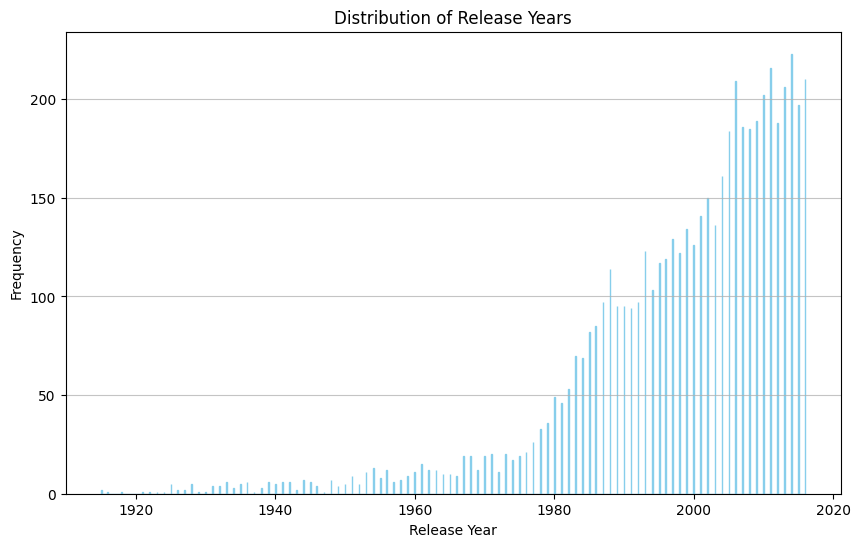

In [162]:
plt.figure(figsize=(10, 6))
plt.hist(movies_lens_USA['year'], bins=1000, color='skyblue', edgecolor='skyblue')
plt.xlabel("Release Year")
plt.ylabel("Frequency")
plt.title("Distribution of Release Years")
plt.grid(axis='y', alpha=0.75)
plt.show()

1) Cut les années trop récentes pas contenues dans le dataframe CMU
2) Merge les 2 dataframes annex
3) Merge annex avec CMU

In [163]:
if 'gross' in movies_dan.columns:
    movies_dan = movies_dan.rename(columns={'name': 'movie_name', 'gross': 'box_office_revenue'})


display(movies_dan.sample(5))
display(movies_dan.shape)
display(movies_dan.info())

,movie_name,year,country,budget,box_office_revenue,runtime
1709,Flesh and Bone,1993,United States,NaN,9709451.0,126.0
2534,Wild Wild West,1999,United States,170000000.0,222104681.0,106.0
351,Against All Odds,1984,United States,13000000.0,21689062.0,128.0
4874,Ricki and the Flash,2015,United States,18000000.0,41325328.0,101.0
4696,Clown,2014,United States,1500000.0,4381603.0,100.0


(5008, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_name          5008 non-null   object 
 1   year                5008 non-null   int64  
 2   country             5008 non-null   object 
 3   budget              4039 non-null   float64
 4   box_office_revenue  5008 non-null   float64
 5   runtime             5007 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 234.9+ KB


None

In [164]:
if 'title' or 'revenue' or 'production_countries' in movies_lens_USA.columns:
    movies_lens_USA = movies_lens_USA.rename(columns={'title': 'movie_name', 'revenue': 'box_office_revenue', 'production_countries': 
                                                     'country'})

display(movies_lens_USA.sample(5))
display(movies_lens_USA.shape)
display(movies_lens_USA.info())
movies_lens_USA.columns

,budget,id,country,box_office_revenue,runtime,movie_name,year
316,25000000.0,40001,United States of America,10070000.0,105.0,Mrs. Winterbourne,1996
2178,49000000.0,10796,United States of America,72700000.0,87.0,The One,2001
202,50000000.0,306,United States of America,119208989.0,104.0,Beverly Hills Cop III,1994
258,800000.0,47889,United States of America,1001437.0,114.0,Ruby in Paradise,1993
1446,19000000.0,32669,United States of America,10000000.0,138.0,The Two Jakes,1990


(5548, 7)

<class 'pandas.core.frame.DataFrame'>
Index: 5548 entries, 0 to 7382
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   budget              4326 non-null   object 
 1   id                  5548 non-null   object 
 2   country             5548 non-null   object 
 3   box_office_revenue  5548 non-null   float64
 4   runtime             5548 non-null   object 
 5   movie_name          5548 non-null   object 
 6   year                5548 non-null   object 
dtypes: float64(1), object(6)
memory usage: 346.8+ KB


None

Index(['budget', 'id', 'country', 'box_office_revenue', 'runtime',
       'movie_name', 'year'],
      dtype='object')

In [165]:
annex = pd.merge(movies_dan, movies_lens_USA, how='outer', on=['movie_name', 'year'])

display(annex.sample(5))
display(annex.shape)
display(annex.info())

annex.columns

,movie_name,year,country_x,budget_x,box_office_revenue_x,runtime_x,budget_y,id,country_y,box_office_revenue_y,runtime_y
884,Hairspray,1988,United States,2000000.0,6673032.0,92.0,NaN,NaN,NaN,NaN,NaN
183,Missing,1982,United States,9500000.0,14000000.0,122.0,<NA>,15600,United States of America,14000000.0,122.0
2703,The Flintstones in Viva Rock Vegas,2000,United States,83000000.0,59468275.0,90.0,83000000.0,889,United States of America,59468275.0,90.0
102,The Funhouse,1981,United States,NaN,7886857.0,96.0,NaN,NaN,NaN,NaN,NaN
2014,The Cure,1995,United States,NaN,2568425.0,97.0,NaN,NaN,NaN,NaN,NaN


(7171, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7171 entries, 0 to 7170
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_name            7171 non-null   object 
 1   year                  7171 non-null   object 
 2   country_x             5010 non-null   object 
 3   budget_x              4041 non-null   float64
 4   box_office_revenue_x  5010 non-null   float64
 5   runtime_x             5009 non-null   float64
 6   budget_y              4326 non-null   object 
 7   id                    5548 non-null   object 
 8   country_y             5548 non-null   object 
 9   box_office_revenue_y  5548 non-null   float64
 10  runtime_y             5548 non-null   object 
dtypes: float64(4), object(7)
memory usage: 616.4+ KB


None

Index(['movie_name', 'year', 'country_x', 'budget_x', 'box_office_revenue_x',
       'runtime_x', 'budget_y', 'id', 'country_y', 'box_office_revenue_y',
       'runtime_y'],
      dtype='object')

In [166]:
def fuse_columns(x, y, column_name):
    if pd.notna(x) and pd.notna(y):
        # Both entries are present
        if x == y:
            # Entries are the same
            return x
        else:
            # Take the mean of the entries
            return (x + y) / 2
    elif pd.notna(x):
        # x is present, y is missing
        return x
    elif pd.notna(y):
        # y is present, x is missing
        return y
    else:
        # Both entries are missing
        return pd.NA

columns_to_fuse = ['budget', 'box_office_revenue', 'runtime']

for column in columns_to_fuse:
    annex[column] = annex.apply(lambda row: fuse_columns(row[f'{column}_x'], row[f'{column}_y'], column), axis=1)

annex = annex.drop(columns=['budget_x', 'box_office_revenue_x', 'runtime_x', 'budget_y', 'box_office_revenue_y', 'runtime_y'])

display(annex.sample(5))
display(annex.shape)
display(annex.info())

,movie_name,year,country_x,id,country_y,budget,box_office_revenue,runtime
4924,Gods of Egypt,2016,United States,205584,United States of America,140000000.0,150680864.0,127.0
953,Bat*21,1988,United States,14911,United States of America,<NA>,3575302.0,105.0
3199,Mean Girls,2004,United States,10625,United States of America,17000000.0,129584574.0,97.0
2572,Arlington Road,1999,United States,NaN,NaN,31000000.0,41067311.0,117.0
5399,Airplane II: The Sequel,1982,NaN,2665,United States of America,<NA>,27150534.0,85.0


(7171, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7171 entries, 0 to 7170
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_name          7171 non-null   object 
 1   year                7171 non-null   object 
 2   country_x           5010 non-null   object 
 3   id                  5548 non-null   object 
 4   country_y           5548 non-null   object 
 5   budget              5594 non-null   object 
 6   box_office_revenue  7171 non-null   float64
 7   runtime             7171 non-null   float64
dtypes: float64(2), object(6)
memory usage: 448.3+ KB


None

In [167]:
display(annex[annex['country_y'].isna() & annex['country_x'].isna()])
annex = annex.drop(columns='country_x')
annex['country_y'] = annex['country_y'].fillna('United States of America')
annex = annex.rename(columns={'country_y': 'country'})

display(annex.sample(5))
display(annex.shape)
display(annex.info())

,movie_name,year,country_x,id,country_y,budget,box_office_revenue,runtime


,movie_name,year,id,country,budget,box_office_revenue,runtime
703,Blue City,1986,NaN,United States of America,10000000.0,6947787.0,83.0
3956,Land of the Lost,2009,18162,United States of America,100000000.0,68733192.5,102.0
2946,The Sweetest Thing,2002,11812,United States of America,43000000.0,69008098.0,84.0
5277,The Exorcist,1973,9552,United States of America,8000000.0,441306145.0,122.0
6852,Tusk,2014,246403,United States of America,2800000.0,1826705.0,102.0


(7171, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7171 entries, 0 to 7170
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_name          7171 non-null   object 
 1   year                7171 non-null   object 
 2   id                  5548 non-null   object 
 3   country             7171 non-null   object 
 4   budget              5594 non-null   object 
 5   box_office_revenue  7171 non-null   float64
 6   runtime             7171 non-null   float64
dtypes: float64(2), object(5)
memory usage: 392.3+ KB


None

In [168]:
check_doublons(annex, ['movie_name'], 'year', 'runtime')

Rows with real duplicates in column movie_name: 
                                       movie_name  year  runtime
2957              Confessions of a Dangerous Mind  2002    113.0
2958              Confessions of a Dangerous Mind  2002    113.0
3033                                Clockstoppers  2002     94.0
3034                                Clockstoppers  2002     94.0
5115                           A Farewell to Arms  1932     89.0
5116                           A Farewell to Arms  1932     89.0
5739  Pokémon 4Ever: Celebi - Voice of the Forest  2001     75.0
5740  Pokémon 4Ever: Celebi - Voice of the Forest  2001     75.0
--------------------------------------------------------------------------------


In [169]:
# annex = fuse_duplicates(annex, ['movie_name'], 'year', 'runtime')
# display(check_doublons(annex, ['movie_name'], 'year', 'runtime'))
# display(annex.sample(5))
# display(annex.shape)
# display(annex.info())

In [170]:
# ratings
DATA_PATH = '../data/'
MOVIELENS_FOLDER = DATA_PATH+'MovieLens/'
MOVIELENS_RATINGS = MOVIELENS_FOLDER+"ratings.csv"
ratings = pd.read_csv(MOVIELENS_RATINGS, sep=',')

display(ratings)
ratingsf = ratings.copy(deep=True)

ratingsf = ratingsf.rename(columns={'movieId':'id'}, errors="raise")

ratingsff = ratingsf.groupby(['id'])[['rating']].mean()
ratingsff['count'] = ratingsf.groupby(['id'])[['rating']].count()
display(ratingsff)


# ! maybe we want to include a minimum number of rankings per movie?
# only keep movies with more than 100 rankings
ratingsfff = ratingsff[ratingsff['count'] > 200]



display(ratingsfff)

,userId,movieId,rating,timestamp
0,1,110.0,1.0,1.425942e+09
1,1,147.0,4.5,1.425942e+09
2,1,858.0,5.0,1.425942e+09
3,1,1221.0,5.0,1.425942e+09
4,1,1246.0,5.0,1.425942e+09
...,...,...,...,...
7074472,73067,344.0,2.5,1.130360e+09
7074473,73067,353.0,3.0,1.130359e+09
7074474,73067,356.0,3.5,1.130360e+09
7074475,73067,364.0,4.5,1.130359e+09


,rating,count
id,,
1.0,3.890673,17873
2.0,3.221873,7004
3.0,3.180250,4086
4.0,2.903346,807
5.0,3.093612,4086
...,...,...
176211.0,4.125000,4
176219.0,2.500000,1
176239.0,3.000000,1


,rating,count
id,,
1.0,3.890673,17873
2.0,3.221873,7004
3.0,3.180250,4086
4.0,2.903346,807
5.0,3.093612,4086
...,...,...
172547.0,2.818182,22
173145.0,3.564103,39
173209.0,3.295455,22


In [171]:
annex = annex[annex['id'].isnull() == False]
annex['id'] = annex['id'].map(float)


In [172]:
ratingsfff.index


Index([     1.0,      2.0,      3.0,      4.0,      5.0,      6.0,      7.0,
            8.0,      9.0,     10.0,
       ...
       170827.0, 170875.0, 171011.0, 171763.0, 171765.0, 172547.0, 173145.0,
       173209.0, 174055.0, 174585.0],
      dtype='float64', name='id', length=11037)

In [173]:
annex_ratings = pd.merge(annex, ratingsff, on=['id'], how='inner')
annex_ratings

,movie_name,year,id,country,budget,box_office_revenue,runtime,rating,count
0,The Blue Lagoon,1980,5689.0,United States of America,4500000.0,58853106.0,104.0,2.931250,80
1,Airplane!,1980,813.0,United States of America,3500000.0,83453539.0,88.0,2.699219,128
2,Friday the 13th,1980,4488.0,United States of America,550000.0,49754601.0,95.0,3.317308,312
3,The Blues Brothers,1980,525.0,United States of America,27000000.0,115229890.0,133.0,3.466667,60
4,Raging Bull,1980,1578.0,United States of America,18000000.0,23201213.5,129.0,2.863636,11
...,...,...,...,...,...,...,...,...,...
1532,Local Color,2006,2324.0,United States of America,3250000.0,32788.0,107.0,4.176624,6695
1533,Wabash Avenue,1950,110669.0,United States of America,2115000.0,2039000.0,92.0,3.857143,49
1534,Billy Gardell: Halftime,2011,134680.0,United States of America,<NA>,60.0,60.0,3.735294,17
1535,Hercules,1983,26452.0,United States of America,<NA>,10676194.0,98.0,3.500000,1


<span style="font-size: 40px;">Merging the Annex and CMU Movies DataFrame</span>

In [174]:
display(movies_USA.sample(5))
display(movies_USA.shape)
display(movies_USA.info())

movies_USA = movies_USA.rename(columns={'release_year': 'year'})

,wiki_ID,free_ID,movie_name,release_year,release_month,box_office_revenue,runtime,languages,country,genres
18643,3613070,/m/09pyqc,The Man Who Would Be King,1975,12,NaN,129.0,English Language,United States of America,"Period piece, Action, Adventure, Film adaptation"
15452,24199899,/m/07k50zn,The Big Bluff,1955,6,NaN,70.0,English Language,United States of America,"Crime Fiction, Thriller, Drama, Film noir"
10739,8009481,/m/026ndn7,The Live Ghost,1934,<NA>,NaN,<NA>,English Language,United States of America,"Short Film, Comedy, Black-and-white"
15978,5265329,/m/0dbl_4,Beretta's Island,1994,<NA>,NaN,95.0,English Language,United States of America,"Crime Fiction, Mystery, Detective fiction, Dra..."
28570,970846,/m/03vgzt,Grand Prix,1966,12,20845016.0,176.0,English Language,United States of America,"Sports, Drama, Auto racing"


(33192, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33192 entries, 0 to 33191
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   wiki_ID             33192 non-null  int64  
 1   free_ID             33192 non-null  object 
 2   movie_name          33192 non-null  object 
 3   release_year        33192 non-null  Int64  
 4   release_month       21892 non-null  Int64  
 5   box_office_revenue  6924 non-null   float64
 6   runtime             29074 non-null  object 
 7   languages           33192 non-null  object 
 8   country             33192 non-null  object 
 9   genres              33192 non-null  object 
dtypes: Int64(2), float64(1), int64(1), object(6)
memory usage: 2.6+ MB


None

In [175]:
USA = pd.merge(movies_USA, annex_ratings, on=['movie_name', 'year'], how='inner')
display(USA.sample(5))
display(USA.shape)
display(USA.info())

,wiki_ID,free_ID,movie_name,year,release_month,box_office_revenue_x,runtime_x,languages,country_x,genres,id,country_y,budget,box_office_revenue_y,runtime_y,rating,count
455,13225630,/m/03bzfwy,King of California,2007,9,1027699.0,93.0,"English Language, Spanish Language",United States of America,"Drama, Indie, Comedy",5718.0,United States of America,<NA>,1027699.0,93.0,2.400000,20
1073,2654186,/m/07vn_9,Zodiac,2007,3,NaN,162.0,English Language,United States of America,"Thriller, Crime Fiction, History, Docudrama, M...",1949.0,United States of America,65000000.0,84785914.0,157.0,4.112397,605
987,2308701,/m/072r5v,Apocalypto,2006,12,121654337.0,139.0,"Maya, Yucatán Language",United States of America,"Adventure, Chase Movie, Epic, Action/Adventure...",1579.0,United States of America,40000000.0,120424258.5,139.0,2.900000,10
1213,350847,/m/01z7v5,Reality Bites,1994,2,33351557.0,99.0,English Language,United States of America,"Romantic comedy, Ensemble Film, Indie, Coming ...",2788.0,United States of America,11500000.0,26715703.5,99.0,3.978994,1690
357,4781857,/m/0cn0sm,The Wanderers,1979,7,5000000.0,117.0,English Language,United States of America,"Crime Fiction, Action/Adventure, Action, Comin...",233.0,United States of America,<NA>,23000000.0,117.0,3.543069,1010


(1325, 17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325 entries, 0 to 1324
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wiki_ID               1325 non-null   int64  
 1   free_ID               1325 non-null   object 
 2   movie_name            1325 non-null   object 
 3   year                  1325 non-null   object 
 4   release_month         1241 non-null   Int64  
 5   box_office_revenue_x  1186 non-null   float64
 6   runtime_x             1315 non-null   object 
 7   languages             1325 non-null   object 
 8   country_x             1325 non-null   object 
 9   genres                1325 non-null   object 
 10  id                    1325 non-null   float64
 11  country_y             1325 non-null   object 
 12  budget                1213 non-null   object 
 13  box_office_revenue_y  1325 non-null   float64
 14  runtime_y             1325 non-null   float64
 15  rating               

None